**Ingestão,Organização,Leitura dos corpus para os projetos** - **Projeto Fake New: FakeTweet.BR (português)**

In [1]:
!pip install plotly

In [2]:
!pip install empath

     |████████████████████████████████| 61kB 2.2MB/s 
  Created wheel for empath: filename=empath-0.89-cp36-none-any.whl size=57823 sha256=39651fb1ab831527ab81f8f6a23285d5c20411f927f4b810d3735d4f7af5d64d
  Stored in directory: /root/.cache/pip/wheels/84/ea/2f/2bc54d4f9985ce61753ebc5b00cb2df51d855589267c667308
Successfully built empath


In [3]:
!pip install wordcloud -q

In [4]:
!pip install ngram

  Created wheel for ngram: filename=ngram-3.3.2-cp36-none-any.whl size=24680 sha256=d54c91dfc0a8b5eaf8004909fe26536eb85504d34a33c5d98774db20c69700ef
  Stored in directory: /root/.cache/pip/wheels/7b/d5/5a/6abe3035c83a606376089accde30b021ffb26593f0d6609ef1
Successfully built ngram


In [5]:
! pip install spacy

In [6]:
!python -m spacy download pt_core_news_sm

     |████████████████████████████████| 21.2MB 1.2MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-cp36-none-any.whl size=21186282 sha256=904bf02b283e4df2e5791e27e92e6bd6affb880abd50a1a76664814526ed8e24
  Stored in directory: /tmp/pip-ephem-wheel-cache-ry8bgcno/wheels/ea/94/74/ec9be8418e9231b471be5dc7e1b45dd670019a376a6b5bc1c0
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')


In [313]:
import numpy as np
import spacy
from spacy.lang.pt import Portuguese
from spacy.lang.pt.stop_words import STOP_WORDS
import spacy.cli
spacy.cli.download("pt_core_news_sm")
import pt_core_news_sm
import re # Importando o módulo "REGEX" para expressões regulares.
from textblob import TextBlob
import pandas as pd
from ngram import NGram
import string
import nltk
from nltk import ngrams
from nltk.util import ngrams
from nltk.corpus import wordnet as wn
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TweetTokenizer
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from empath import Empath

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV #com cross validation
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import warnings
warnings.filterwarnings("ignore")

✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')


In [75]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [76]:
import os;os.listdir("/content/gdrive/My Drive/fakenews")

['FakeTweetBr.csv']

In [123]:
dir = "/content/gdrive/My Drive/fakenews"
file = dir + "/" + "FakeTweetBr.csv"
df = pd.read_csv(file)
df

,Unnamed: 0,id,subject,text,classificacao,date,retweets,favorites,permalink
0,0,1.124513e+18,macaco marielle,Marielle >BANDIDOS Narco-traficantes-Milícias ...,fake,2019-05-04 0:16,0,0,https://twitter.com/MRTT_/status/1124513050218...
1,1,1.124049e+18,macaco marielle,"Bem, as últimas noticias a respeito disso que ...",fake,2019-05-02 17:33,0,0,https://twitter.com/EvaristoKlebber/status/112...
2,5,1.119295e+18,macaco marielle,@jornalnacional convivi com notícias da Mariel...,fake,2019-04-19 14:41,0,0,https://twitter.com/luiztemper/status/11192950...
3,10,1.114583e+18,macaco marielle,"O Cesari Battisti confessou seus crimes, a esq...",fake,2019-04-06 14:36,0,0,https://twitter.com/GrimoaldoL/status/11145825...
4,11,1.113246e+18,macaco marielle,[Agência Lupa] Verificamos: É falso que Thiago...,true,2019-04-02 22:04,1,0,https://twitter.com/antmarobel/status/11132459...
...,...,...,...,...,...,...,...,...,...
274,1345,1.118650e+18,jair time personalidade,"Por “ruptura com a corrupção”, apenas um brasi...",fake,2019-04-17 20:00,0,0,https://twitter.com/kohavitt/status/1118650345...
275,1405,1.090221e+18,jair time personalidade,"Pessoal, a revista americana TIME incluiu Jair...",fake,2019-01-29 9:10,2,1,https://twitter.com/alcamorim/status/109022062...
276,1480,1.073590e+18,jair time personalidade,QUE COMECE O MIMIMI DOS BOLSOBURROS. Jair Bols...,true,2018-12-14 11:47,0,1,https://twitter.com/jorgetemer/status/10735903...
277,1499,1.072787e+18,jair time personalidade,Circula nas redes sociais uma foto da capa da ...,true,2018-12-12 6:37,0,1,https://twitter.com/juidsonjoc/status/10727874...


**ANÁLISE DOS TWEETS**

In [124]:
df['palavras'] = df['text'].apply(lambda x: len(str(x).split())) #Quantidade de Palavras

In [125]:
df['letras'] = df['text'].apply(lambda x: len(x)) #Quantidade de Letras

In [126]:
df['stop_words'] = df['text'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS])) #Quantidade de Stop_Words

In [127]:
df['hashtags'] = df['text'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))  # Quantidade de Hashtags

In [128]:
df['mencoes'] = df['text'].apply(lambda x: len([t for t in x.split() if t.startswith('@')])) #Quantidade de Menções

In [129]:
df['numeros'] = df['text'].apply(lambda x: len([t for t in x.split() if t.isdigit()])) #Quantidade de Números 

In [130]:
df['caixa_alta'] = df['text'].apply(lambda x: len([t for t in x.split() if t.isupper() and t != '@USER'])) #Quantidade de palvras em Caixa Alta

In [131]:
df['date'] =  pd.to_datetime(df['date'], format='%Y/%m/%d %H:%M')#Transformando a data de string pra data

In [132]:
df['ano'] =   df['date'].dt.year #Pegando o ano do Tweet

In [133]:
df['diasemana'] =df['date'].dt.day_name()

In [134]:
df

,Unnamed: 0,id,subject,text,classificacao,date,retweets,favorites,permalink,palavras,letras,stop_words,hashtags,mencoes,numeros,caixa_alta,ano,diasemana
0,0,1.124513e+18,macaco marielle,Marielle >BANDIDOS Narco-traficantes-Milícias ...,fake,2019-05-04 00:16:00,0,0,https://twitter.com/MRTT_/status/1124513050218...,34,307,7,3,6,0,7,2019,Saturday
1,1,1.124049e+18,macaco marielle,"Bem, as últimas noticias a respeito disso que ...",fake,2019-05-02 17:33:00,0,0,https://twitter.com/EvaristoKlebber/status/112...,37,217,12,0,0,0,0,2019,Thursday
2,5,1.119295e+18,macaco marielle,@jornalnacional convivi com notícias da Mariel...,fake,2019-04-19 14:41:00,0,0,https://twitter.com/luiztemper/status/11192950...,43,251,15,0,1,1,0,2019,Friday
3,10,1.114583e+18,macaco marielle,"O Cesari Battisti confessou seus crimes, a esq...",fake,2019-04-06 14:36:00,0,0,https://twitter.com/GrimoaldoL/status/11145825...,39,233,7,0,0,0,2,2019,Saturday
4,11,1.113246e+18,macaco marielle,[Agência Lupa] Verificamos: É falso que Thiago...,true,2019-04-02 22:04:00,1,0,https://twitter.com/antmarobel/status/11132459...,18,183,4,0,0,0,1,2019,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,1345,1.118650e+18,jair time personalidade,"Por “ruptura com a corrupção”, apenas um brasi...",fake,2019-04-17 20:00:00,0,0,https://twitter.com/kohavitt/status/1118650345...,37,361,7,0,0,0,8,2019,Wednesday
275,1405,1.090221e+18,jair time personalidade,"Pessoal, a revista americana TIME incluiu Jair...",fake,2019-01-29 09:10:00,2,1,https://twitter.com/alcamorim/status/109022062...,48,319,12,0,0,0,10,2019,Tuesday
276,1480,1.073590e+18,jair time personalidade,QUE COMECE O MIMIMI DOS BOLSOBURROS. Jair Bols...,true,2018-12-14 11:47:00,0,1,https://twitter.com/jorgetemer/status/10735903...,25,267,4,0,2,0,7,2018,Friday
277,1499,1.072787e+18,jair time personalidade,Circula nas redes sociais uma foto da capa da ...,true,2018-12-12 06:37:00,0,1,https://twitter.com/juidsonjoc/status/10727874...,49,273,13,1,0,0,4,2018,Wednesday


In [135]:
cols = df.columns.tolist()
cols

['Unnamed: 0',
 'id',
 'subject',
 'text',
 'classificacao',
 'date',
 'retweets',
 'favorites',
 'permalink',
 'palavras',
 'letras',
 'stop_words',
 'hashtags',
 'mencoes',
 'numeros',
 'caixa_alta',
 'ano',
 'diasemana']

**Distribuição de Tweets por Ano**

<function matplotlib.pyplot.plot>

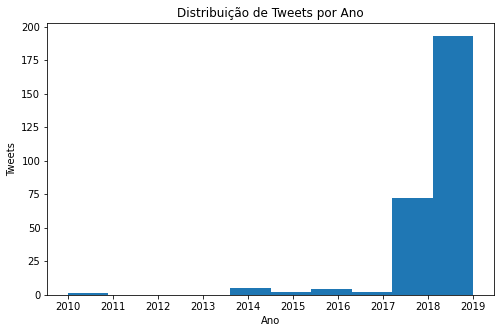

In [136]:
ano = df['ano']
plt.figure(figsize=(8, 5))
plt.hist(ano)
plt.title('Distribuição de Tweets por Ano')
plt.xlabel('Ano')
plt.ylabel('Tweets')
plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
plt.plot

**Dia da Semana que mais possuem Tweets**

In [137]:
trace = go.Bar(x = df['diasemana'],
               y = df['ano'],
               marker = {'color':'#ff9f43'}) 
data = [trace]
py.iplot(data)

**Normalização do Tweets**

In [138]:
df['text'] = df['text'].apply(lambda x: x.lower()) #Transformando o texto dos Tweets em Caixa Baixa

In [139]:
df['text']  = df['text'] .apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x)) #Removendo pontuação e caracter

In [140]:
df['text']  = df['text'] .apply(lambda x: re.sub('(user |user| user )+',' user ', x)) #Removendo repetições de menções @User no tweet

In [141]:
df['text'] = df['text'].apply(lambda x: " ".join(x.split())) #Removendo espaços múltiplos nos Tweets

In [142]:
df['text'] = df['text'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS])) #Removendo Stop_Words

In [336]:
df

,Unnamed: 0,id,subject,text,classificacao,date,retweets,favorites,permalink,palavras,letras,stop_words,hashtags,mencoes,numeros,caixa_alta,ano,diasemana,vetor
0,0,1.124513e+18,macaco marielle,bandido bolar mandante crime pt assassinar acu...,fake,2019-05-04 00:16:00,0,0,https://twitter.com/MRTT_/status/1124513050218...,34,307,7,3,6,0,7,2019,Saturday,"[[3.4469292, -0.3465168, 2.221047, -1.7023438,..."
1,1,1.124049e+18,macaco marielle,respeitar verdadeiro assassinar acusar ser col...,fake,2019-05-02 17:33:00,0,0,https://twitter.com/EvaristoKlebber/status/112...,37,217,12,0,0,0,0,2019,Thursday,"[[0.28669003, 1.2326055, -0.22275029, -2.09330..."
2,5,1.119295e+18,macaco marielle,notcias durante 3 quase dia parar s descobrir ...,fake,2019-04-19 14:41:00,0,0,https://twitter.com/luiztemper/status/11192950...,43,251,15,0,1,1,0,2019,Friday,"[[0.58501357, 0.14143065, 0.41258046, -0.47682..."
3,10,1.114583e+18,macaco marielle,confessar crime esquerdo calar assassinar desc...,fake,2019-04-06 14:36:00,0,0,https://twitter.com/GrimoaldoL/status/11145825...,39,233,7,0,0,0,2,2019,Saturday,"[[3.6735263, -1.2809472, -1.5915415, -3.858445..."
4,11,1.113246e+18,macaco marielle,agncia lupa verificar falsar thiago identifica...,true,2019-04-02 22:04:00,1,0,https://twitter.com/antmarobel/status/11132459...,18,183,4,0,0,0,1,2019,Tuesday,"[[4.095914, -4.5904274, -1.518286, -1.8246305,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,1345,1.118650e+18,jair time personalidade,brasileiro aparecer 100 influente revisto time...,fake,2019-04-17 20:00:00,0,0,https://twitter.com/kohavitt/status/1118650345...,37,361,7,0,0,0,8,2019,Wednesday,"[[1.3864264, -0.6446691, 1.4177501, -1.6576285..."
275,1405,1.090221e+18,jair time personalidade,pessoal revisto americano time jair bolsonaro ...,fake,2019-01-29 09:10:00,2,1,https://twitter.com/alcamorim/status/109022062...,48,319,12,0,0,0,10,2019,Tuesday,"[[3.1640413, -1.3352213, 0.7521674, -1.7330017..."
276,1480,1.073590e+18,jair time personalidade,jair bolsonaro eleito personalidade ano revist...,true,2018-12-14 11:47:00,0,1,https://twitter.com/jorgetemer/status/10735903...,25,267,4,0,2,0,7,2018,Friday,"[[3.300277, -1.4483643, 2.7977667, -1.5720924,..."
277,1499,1.072787e+18,jair time personalidade,circular rede social foto capar revisto time p...,true,2018-12-12 06:37:00,0,1,https://twitter.com/juidsonjoc/status/10727874...,49,273,13,1,0,0,4,2018,Wednesday,"[[1.1622885, -0.59774894, 3.886876, -1.4223683..."


In [144]:
nlp = pt_core_news_sm.load()

In [145]:
def tweet_lemma(x):
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        x_list.append(lemma)
    return(" ".join(x_list))

In [146]:
df['text'] = df['text'].apply(lambda x: tweet_lemma(x))#Lematizando os tweets

In [147]:
df['text']

0      marielle bandido narco-traficantes-milcias pis...
1      ltimas noticiar o respeitar o verdadeiro assas...
2      jornalnacional conviver notcias marielle duran...
3      o cesari battisti confessar crime o esquerdo c...
4      agncia lupa verificar falsar thiago macaco ide...
                             ...                        
274    ruptura o corrupo brasileiro aparecer 100 infl...
275    pessoal o revisto americano time incluir jair ...
276    começar o mimimi bolsoburros jair bolsonaro el...
277    circular rede social foto capar revisto time o...
278    circular rede social publicaes afirmar o bicar...
Name: text, Length: 279, dtype: object

In [364]:
def palavras_comuns(x): #Função para pegar as 10 palavras mais recorrentes nos Tweets
    text = ' '.join(x)
    text = text.split()
    freq_comm = pd.Series(text).value_counts()
    f10 = freq_comm[:10]
    return f10

In [365]:
df10 = palavras_comuns(df['text']) #As 10 palavras mais recorrentes nos Tweets
df10

esperana     30
bolsonaro    29
criana       29
s            27
travestir    27
-            27
chamar       26
thiago       25
http         25
dilma        23
dtype: int64

In [150]:
df['text'] = df['text'].apply(lambda x: " ".join(t for t in x.split() if t not in df10))#remoção das 10 palavras mais recorrentes nos tweets

In [151]:
df['text']

0      bandido narco-traficantes-milcias pisar bolar ...
1      ltimas noticiar respeitar verdadeiro assassina...
2      jornalnacional conviver notcias durante 3 quas...
3      cesari battisti confessar crime esquerdo calar...
4      agncia lupa verificar falsar thiago identifica...
                             ...                        
274    ruptura corrupo brasileiro aparecer 100 influe...
275    pessoal revisto americano time incluir jair bo...
276    começar mimimi bolsoburros jair bolsonaro elei...
277    circular rede social foto capar revisto time p...
278    circular rede social publicaes afirmar bicarbo...
Name: text, Length: 279, dtype: object

In [152]:
def palavras_raras(x):#Função para pegar as palavras com recorrência de 1 vez nos tweets
    text = ' '.join(x)
    text = text.split()
    freq_comm = pd.Series(text).value_counts()
    rare_words = freq_comm[freq_comm.values == 1]
    return rare_words

In [153]:
dfraras = palavras_raras(df['text'])#Listando as palavras raras dos Tweets, com uma única ocorrência
dfraras

pictwittercombqxn9sy4i9    1
patro                      1
pictwittercomimn74td0fi    1
ex-presidentes             1
valeassassina              1
                          ..
fbme4kwx48fzq              1
4                          1
pagar                      1
citar                      1
yes                        1
Length: 1168, dtype: int64

In [154]:
df['text'] = df['text'].apply(lambda x: " ".join(t for t in x.split() if t not in dfraras))#Remoção das palavras raras

In [155]:
df['text']

0      bandido bolar mandante crime pt assassinar acu...
1      respeitar verdadeiro assassinar acusar ser col...
2      notcias durante 3 quase dia parar s descobrir ...
3      confessar crime esquerdo calar assassinar desc...
4      agncia lupa verificar falsar thiago identifica...
                             ...                        
274    brasileiro aparecer 100 influente revisto time...
275    pessoal revisto americano time jair bolsonaro ...
276    jair bolsonaro eleito personalidade ano revist...
277    circular rede social foto capar revisto time p...
278    circular rede social afirmar ajudar curar cnce...
Name: text, Length: 279, dtype: object

In [348]:
def palavras_ordemdecrescente(x): #Função para pegar as 10 palavras mais recorrentes nos Tweets
    text = ' '.join(x)
    text = text.split()
    freq_comm = pd.Series(text).value_counts()
    f10 = freq_comm[:1000]
    return f10

In [349]:
dfpalavras = palavras_ordemdecrescente(df['text'])#Listando as palavras raras dos Tweets, com uma única ocorrência
dfpalavras 

esperana                             30
bolsonaro                            29
criana                               29
s                                    27
travestir                            27
                                     ..
benefcios                             2
republicadecuritibanet20190315her     2
marcar                                2
aps                                   2
invaso                                2
Length: 615, dtype: int64

In [350]:
palavras=str(dfpalavras)

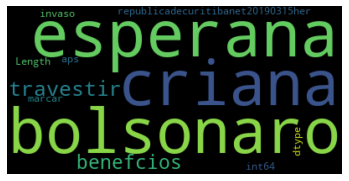

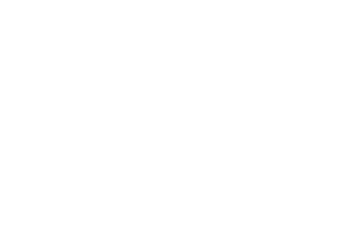

In [351]:
wordcloud = WordCloud().generate(palavras)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.figure()
plt.axis("off")
plt.show()

**FEATURES CRIADAS** 

In [331]:
dftratado = df.drop(labels=['id', 'Unnamed: 0' ,'retweets','favorites', 'subject', 'text', 'date', 'classificacao', 'permalink','ano','diasemana'], axis = 1).reset_index(drop=True)
dftratado

,palavras,letras,stop_words,hashtags,mencoes,numeros,caixa_alta,vetor
0,34,307,7,3,6,0,7,"[[3.4469292, -0.3465168, 2.221047, -1.7023438,..."
1,37,217,12,0,0,0,0,"[[0.28669003, 1.2326055, -0.22275029, -2.09330..."
2,43,251,15,0,1,1,0,"[[0.58501357, 0.14143065, 0.41258046, -0.47682..."
3,39,233,7,0,0,0,2,"[[3.6735263, -1.2809472, -1.5915415, -3.858445..."
4,18,183,4,0,0,0,1,"[[4.095914, -4.5904274, -1.518286, -1.8246305,..."
...,...,...,...,...,...,...,...,...
274,37,361,7,0,0,0,8,"[[1.3864264, -0.6446691, 1.4177501, -1.6576285..."
275,48,319,12,0,0,0,10,"[[3.1640413, -1.3352213, 0.7521674, -1.7330017..."
276,25,267,4,0,2,0,7,"[[3.300277, -1.4483643, 2.7977667, -1.5720924,..."
277,49,273,13,1,0,0,4,"[[1.1622885, -0.59774894, 3.886876, -1.4223683..."


In [337]:
df_features = pd.DataFrame()
df_features

""


In [339]:
df_features= df[['palavras','letras', 'stop_words', 'hashtags','mencoes','numeros','caixa_alta']]
df_features

,palavras,letras,stop_words,hashtags,mencoes,numeros,caixa_alta
0,34,307,7,3,6,0,7
1,37,217,12,0,0,0,0
2,43,251,15,0,1,1,0
3,39,233,7,0,0,0,2
4,18,183,4,0,0,0,1
...,...,...,...,...,...,...,...
274,37,361,7,0,0,0,8
275,48,319,12,0,0,0,10
276,25,267,4,0,2,0,7
277,49,273,13,1,0,0,4


**UNIGRAMA**

In [158]:
unigrama= CountVectorizer()

In [159]:
VOCABULARIO_TWEETS = unigrama.fit(df['text']).vocabulary_

In [295]:
text = unigrama.transform(df['text']) #guarda BOW em text
dfr1_bow = pd.DataFrame(text.toarray(), columns=unigrama.get_feature_names())
dfr1_bow 

,04,100,15,2006,400,5000000,64,73,abin,abril,absurdo,acabar,achar,acidentar,acontecer,acordar,acreditar,acusar,adlio,advogar,aeronave,afirmar,afrontar,agncia,agrcolas,ah,ajudar,alegar,algum,alm,almoa,almoo,alto,alves,ambiental,americano,amm,amor,amrica,anca,...,urca,urgente,usar,vagabundo,valer,vc,vcs,vdeo,velocidade,venezuela,venezuelano,ver,verba,verdade,verdadeiro,vereador,verificar,verme,vermelho,violncia,vir,virar,visitar,viver,vivo,vixi,vizinho,vm,voc,vocs,voltar,vos,vrios,vtima,vtimas,wyllys,xingar,youtube,zap,zuvic
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**BIGRAMA**

In [161]:
bigrama = CountVectorizer(ngram_range=(2,2))

In [162]:
VOCABULARIO_TWEETS = bigrama.fit(df['text']).vocabulary_

In [296]:
text = bigrama.transform(df['text']) #guarda BOW em text
dfr2_bow = pd.DataFrame(text.toarray(), columns=bigrama.get_feature_names())
dfr2_bow 

,04 soltar,100 influente,100 revisto,100 verba,15 doar,15 helicpteros,2006 ano,2006 dizer,400 mulher,5000000 atentar,5000000 jean,64 apache,64 bandido,64 brasil,64 ir,64 retalhar,73 dilma,73 milhes,73 milhoes,73 salo,abin negar,abin respeitar,abril stf,absurdo est,absurdo ministro,acabar compartilhar,acabar farra,acabar lei,acabar lixar,acabar radar,achar direito,achar est,acidentar casar,acidentar rachadura,acontecer invadir,acordar forbes,acreditar forbes,acreditar mentira,acreditar plantar,acusar carlosbolsonaro,...,vm reivindicar,voc achar,voc conhea,voc curitiba,voc dizer,voc forbes,voc haver,voc respeitar,voc so,vocs acreditar,vocs culpar,vocs jairbolsonaro,vocs so,vocs to,vocs voltar,voltar circular,voltar falar,voltar vocs,vos atrapalhar,vos cair,vos calar,vos causar,vos conseguir,vos nome,vos pas,vrios cncer,vrios pino,vtima morte,vtima sociedade,vtimas crime,vtimas doaes,vtimas rompimento,vtimas tragdia,wyllys contar,wyllys maria,xingar travestir,zap algum,zap zap,zuvic pai,zuvic zuvic
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**WORD EMBEDDINGS**

In [169]:
def vetor(x):
    doc = nlp(x)
    return doc.vector.reshape(1, -1)

In [170]:
df['vetor'] = df['text'].apply(lambda x: vetor(x))
df['vetor']

0      [[3.4469292, -0.3465168, 2.221047, -1.7023438,...
1      [[0.28669003, 1.2326055, -0.22275029, -2.09330...
2      [[0.58501357, 0.14143065, 0.41258046, -0.47682...
3      [[3.6735263, -1.2809472, -1.5915415, -3.858445...
4      [[4.095914, -4.5904274, -1.518286, -1.8246305,...
                             ...                        
274    [[1.3864264, -0.6446691, 1.4177501, -1.6576285...
275    [[3.1640413, -1.3352213, 0.7521674, -1.7330017...
276    [[3.300277, -1.4483643, 2.7977667, -1.5720924,...
277    [[1.1622885, -0.59774894, 3.886876, -1.4223683...
278    [[4.4257627, -1.1623107, 0.09821499, -2.259749...
Name: vetor, Length: 279, dtype: object

In [269]:
df2 = df['classificacao'].apply(lambda x: vetor(x))
np.array(df2) #convertendo vetor em Matriz
df2

0      [[11.016141, -3.1542284, 3.1679096, 0.6292312,...
1      [[11.016141, -3.1542284, 3.1679096, 0.6292312,...
2      [[11.016141, -3.1542284, 3.1679096, 0.6292312,...
3      [[11.016141, -3.1542284, 3.1679096, 0.6292312,...
4      [[15.133831, -3.2269745, 5.400416, -1.6882635,...
                             ...                        
274    [[11.016141, -3.1542284, 3.1679096, 0.6292312,...
275    [[11.016141, -3.1542284, 3.1679096, 0.6292312,...
276    [[15.133831, -3.2269745, 5.400416, -1.6882635,...
277    [[15.133831, -3.2269745, 5.400416, -1.6882635,...
278    [[15.133831, -3.2269745, 5.400416, -1.6882635,...
Name: classificacao, Length: 279, dtype: object

**EMPATH**

In [270]:
lexicon = Empath() 

In [271]:
empath_tweets = df['text'].apply(lexicon.analyze).apply(pd.Series)
empath_tweets

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,prison,health,pride,dispute,nervousness,government,weakness,horror,swearing_terms,leisure,suffering,royalty,wealthy,tourism,furniture,school,magic,beach,journalism,morning,...,car,strength,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**REMOVENDO VALORES INFINITOS E NULOS**

In [372]:
df.fillna(0.0, inplace=True)
dfr1_bow.fillna(0.0, inplace=True)
dfr2_bow.fillna(0.0, inplace=True)
df_features.fillna(0.0, inplace=True)
df2.fillna(0.0, inplace=True)

In [373]:
X = df #Tweets
print(X)

np.array(df2)
y = df2 #Classificação
print(y)

     Unnamed: 0  ...                                              vetor
0             0  ...  [[3.4469292, -0.3465168, 2.221047, -1.7023438,...
1             1  ...  [[0.28669003, 1.2326055, -0.22275029, -2.09330...
2             5  ...  [[0.58501357, 0.14143065, 0.41258046, -0.47682...
3            10  ...  [[3.6735263, -1.2809472, -1.5915415, -3.858445...
4            11  ...  [[4.095914, -4.5904274, -1.518286, -1.8246305,...
..          ...  ...                                                ...
274        1345  ...  [[1.3864264, -0.6446691, 1.4177501, -1.6576285...
275        1405  ...  [[3.1640413, -1.3352213, 0.7521674, -1.7330017...
276        1480  ...  [[3.300277, -1.4483643, 2.7977667, -1.5720924,...
277        1499  ...  [[1.1622885, -0.59774894, 3.886876, -1.4223683...
278        2011  ...  [[4.4257627, -1.1623107, 0.09821499, -2.259749...

[279 rows x 19 columns]
0      [[11.016141, -3.1542284, 3.1679096, 0.6292312,...
1      [[11.016141, -3.1542284, 3.1679096, 0.6292312,.

**MACHINE LEARNING**

In [321]:
gnb = GaussianNB()
lgr = LogisticRegression(random_state=42, max_iter=200)
svm = LinearSVC(random_state=42, max_iter=200)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)
knn=KNeighborsClassifier(n_neighbors=1)
dmm = DummyClassifier()
rdg = RidgeClassifier()
ada = AdaBoostClassifier()
clf = {'GNB': gnb, 'LGR': lgr, 'SVM': svm, 'RFC': rfc, 'KNN':knn, 'DMM':dmm, 'RDG':rdg, 'ADA':ada}
clf.keys()

dict_keys(['GNB', 'LGR', 'SVM', 'RFC', 'KNN', 'DMM', 'RDG', 'ADA'])

In [322]:
binarizador_label = LabelBinarizer()
c = df['classificacao']

y = binarizador_label.fit_transform(c)

y.shape

(279, 1)

In [323]:
X.shape

(279, 19)

In [324]:
dfr2_bow.shape

(279, 1996)

In [325]:
def classify(X,y):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    y = scaler.fit_transform(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
    
    
    for key in clf.keys():
        clf[key].fit(X_train,np.ravel(y_train,order='C'))
        y_pred = clf[key].predict(X_test)
        ac = cross_val_score(clf[key], X, y, cv=5)
        f1 = f1_score(y_test, y_pred, average='macro')
        print(key, " ---- RESULTADOS: ", 'precisão:', np.mean(ac), 'f1 score:', f1)

In [326]:
classify(dfr1_bow, y)

GNB  ---- RESULTADOS:  precisão: 0.7167532467532467 f1 score: 0.8444444444444443
LGR  ---- RESULTADOS:  precisão: 0.7994805194805195 f1 score: 0.8733031674208145
SVM  ---- RESULTADOS:  precisão: 0.8061688311688313 f1 score: 0.8771929824561404
RFC  ---- RESULTADOS:  precisão: 0.7885064935064935 f1 score: 0.825
KNN  ---- RESULTADOS:  precisão: 0.6988961038961039 f1 score: 0.6994633273703041
DMM  ---- RESULTADOS:  precisão: 0.5515584415584416 f1 score: 0.3902353354408149
RDG  ---- RESULTADOS:  precisão: 0.8062337662337662 f1 score: 0.8587387387387388
ADA  ---- RESULTADOS:  precisão: 0.8244805194805196 f1 score: 0.8362573099415205


In [327]:
classify(dfr2_bow, y)

GNB  ---- RESULTADOS:  precisão: 0.5914935064935065 f1 score: 0.7447916666666667
LGR  ---- RESULTADOS:  precisão: 0.7133116883116883 f1 score: 0.780392156862745
SVM  ---- RESULTADOS:  precisão: 0.7311688311688311 f1 score: 0.7619047619047619
RFC  ---- RESULTADOS:  precisão: 0.6954545454545455 f1 score: 0.6818181818181819
KNN  ---- RESULTADOS:  precisão: 0.7062337662337663 f1 score: 0.6652873563218391
DMM  ---- RESULTADOS:  precisão: 0.5485714285714287 f1 score: 0.5047619047619047
RDG  ---- RESULTADOS:  precisão: 0.7311688311688311 f1 score: 0.7619047619047619
ADA  ---- RESULTADOS:  precisão: 0.7346753246753247 f1 score: 0.7440797673452431


In [340]:
classify(df_features,y)

GNB  ---- RESULTADOS:  precisão: 0.4656493506493506 f1 score: 0.49444444444444446
LGR  ---- RESULTADOS:  precisão: 0.6664935064935065 f1 score: 0.3978494623655914
SVM  ---- RESULTADOS:  precisão: 0.6377272727272728 f1 score: 0.5108045977011495
RFC  ---- RESULTADOS:  precisão: 0.6666883116883118 f1 score: 0.65
KNN  ---- RESULTADOS:  precisão: 0.5735714285714286 f1 score: 0.6111111111111112
DMM  ---- RESULTADOS:  precisão: 0.5662337662337662 f1 score: 0.5579559617781471
RDG  ---- RESULTADOS:  precisão: 0.6306493506493507 f1 score: 0.5227272727272727
ADA  ---- RESULTADOS:  precisão: 0.6487012987012987 f1 score: 0.5902439024390245
